#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
#!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X= dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X= sc.fit_transform(X)
print(X)
print(X.shape)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]
(690, 15)


##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10,y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

##Visualizing the results


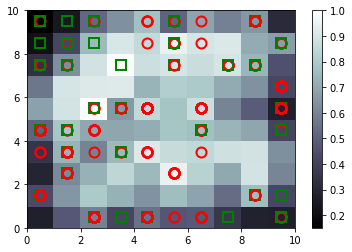

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
#show()

## Finding the frauds


In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,5)], mappings[(5,8)]), axis =0)
frauds = sc.inverse_transform(frauds)


##Printing the Fraunch Clients

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15571121
15660390
15790254
15768600
15748552
15757467
15682576
15642391
15801441
15815443
15748432
15577515
15598802
15708714
15705343
15657778
15788131
15652658
15635244
15699963
15624595
15688264
15771856
15648876
15679394
15720644
15696287
15808023
15795079
15808386
15698749
15746258
15644878
15671987
15764841
15748649
15729718
15786539
15773776
15778345
15581700
15700511
15791769
15629133
15604963
15667588
15776494
15580914
15684512
15691150
15678210
15686885
15664615
15607986
15585928
15680895
15716276
15583067
15578722
15623072
15569682
15587038
15592773
15591107
15674583
15588854


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [10]:
customers= dataset.iloc[:, 1:].values
customers

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

## Create Dependent Variable

In [11]:
isFraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        isFraud[i] = 1
print(isFraud)

[0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#Part 3 - ANN

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [13]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
print(tf.__version__)

2.2.0


## Initializing the ANN

In [14]:
classifier = Sequential()

##Adding the input layer and the first hidden layer

In [15]:
classifier.add(Dense(units=2, kernel_initializer = 'uniform', activation = 'relu', input_dim=15))


## Adding the output layer

In [16]:
classifier.add(Dense(units=1, activation = 'sigmoid'))

## Training the ANN

## Compiling the ANN

In [17]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the ANN on the Training set

In [18]:
classifier.fit(customers,isFraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.6003 - accuracy: 0.8812: 0s - loss: 0.650
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4666 - accuracy: 0.9043


## Predicting test set results

In [19]:
y_pred = classifier.predict(customers)
print(y_pred)

[[0.29037946]
 [0.2913233 ]
 [0.29037946]
 [0.32145277]
 [0.31432873]
 [0.36468282]
 [0.29037946]
 [0.3812749 ]
 [0.29037946]
 [0.31072754]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.3631236 ]
 [0.29037946]
 [0.36703157]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.36129868]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.32616246]
 [0.300027  ]
 [0.29037946]
 [0.29037946]
 [0.2905658 ]
 [0.29037946]
 [0.29037946]
 [0.3254295 ]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.38447902]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.31178522]
 [0.2915094 ]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29831803]
 [0.29037946]
 [0.32521516]
 [0.32749557]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.29037946]
 [0.33

In [20]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred

array([[1.55924120e+07, 2.90379435e-01],
       [1.56875270e+07, 2.90379465e-01],
       [1.57610470e+07, 2.90379465e-01],
       ...,
       [1.57783450e+07, 3.91196758e-01],
       [1.55988020e+07, 3.98627341e-01],
       [1.55775150e+07, 4.04906303e-01]])